$$\textrm{Joaquin Peñuela Parra}$$
$$\textrm{University of Los Andes}$$
$$\textrm{High Energy Physics Group: Phenomenology of Particles}$$

This code was written to be running in Docker. If you do not have a Docker inside hep-server2 please refer to: https://github.com/Phenomenology-group-uniandes/Tutoriales_Generales

In [1]:
import os, sys
sys.path.append(os.path.join(os.getcwd().split("Leptoquarks_Searches_2023")[0]))

from Uniandes_Framework.delphes_reader import DelphesLoader 
from Uniandes_Framework.delphes_reader import root_analysis 
from Uniandes_Framework.delphes_reader import Quiet 

from ROOT import TH1F 
from ROOT import TCanvas 
from ROOT import THStack 
from ROOT import TLegend 
from ROOT import TLatex 

import pandas as pd
import numpy as np

Welcome to JupyROOT 6.22/06


In [2]:
channels = ['hadronic_non-resonant','hadronic_sLQ','hadronic_dLQ','semileptonic_non-resonant','semileptonic_sLQ','semileptonic_dLQ']

signals = ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']
Masses = [#'1250', 
          '1500', 
          #'1750', '2000', '2250', '2500'
]
suffix_by_betard = {'wRHC': '', 'woRHC': '_wo_RHC'}

In [3]:
csv_folder = '/disco4/pheno_csv_files/Leptoquarks_Searches/'
bkgs = ['ttbar', 'stop']

In [4]:
#Testing
csv_folder = '/disco4/pheno_csv_files/Leptoquarks_Searches/'
bkgs = ['ttbar', 'stop','z_jets', 'w_jets', 'ww', 'wz', 'zz']

In [5]:
Datasets_signal = {} 

for key in suffix_by_betard:
    Datasets_signal[key] = {}
    for channel in channels:
        Datasets_signal[key][channel] = {}
        for M in Masses:
            Datasets_signal[key][channel][M] = {}
            for signal in signals:
                Datasets_signal[key][channel][M][signal] = {}
                path_csv = os.path.join(csv_folder, f'{signal}{suffix_by_betard[key]}_{M}', f'{signal}{suffix_by_betard[key]}_{M}_{channel}.csv')
                try: 
                    Datasets_signal[key][channel][M][signal] = pd.read_csv(path_csv)
                    Datasets_signal[key][channel][M][signal]["sT(GeV)"] = Datasets_signal[key][channel][M][signal]["sT(GeV)"]/1000 #Scaling Xaxis to TeV
                except: print(f'{path_csv} is empty or the path is wrong.')
    
Datasets_bkg = {} 

for channel in channels:
    Datasets_bkg[channel] = {}
    for bkg in bkgs:
        Datasets_bkg[channel][bkg] = {}
        path_csv = os.path.join(csv_folder, f'{bkg}', f'{bkg}_{channel}.csv')
        try: 
            Datasets_bkg[channel][bkg] = pd.read_csv(path_csv)
            Datasets_bkg[channel][bkg]["sT(GeV)"] = Datasets_bkg[channel][bkg]["sT(GeV)"]/1000 #Scaling Xaxis to TeV
        except: print(f'{path_csv} is empty or the path is wrong.')

In [6]:
Datasets_bkg['hadronic_sLQ']['ttbar'].head()

,pT_{#tau_{1}}(GeV),#eta_{#tau_{1}},#phi_{#tau_{1}},Energy_{#tau_{1}}(GeV),#Delta R_{#tau_{1}#tau_{2}},#Delta #eta_{#tau_{1}#tau_{2}},#Delta #phi_{#tau_{1}#tau_{2}},#Delta pT_{#tau_{1}#tau_{2}}(GeV),#Delta #vec{pT}_{#tau_{1}#tau_{2}}(GeV),#Delta #vec{p}_{#tau_{1}#tau_{2}}(GeV),...,#Delta pT_{b_{1}MET}(GeV),#Delta #vec{pT}_{b_{1}MET}(GeV),pT_{MET}(GeV),#phi_{MET},sT(GeV),hT(GeV),mT(GeV),light_jets_multiplicity,Mass_{#tau_{1}#tau_{2}}(GeV),Q_{#tau_{1}}Q_{#tau_{2}}
0,69.688416,-1.285490,-1.021984,136.025710,3.251400,-1.588039,-2.837206,16.783653,121.202823,179.667662,...,40.601942,41.127434,17.979631,-2.407763,0.199154,126.409191,788.354085,2.0,162.038032,-1.0
1,116.981773,0.032178,-1.066242,117.454352,0.996346,0.301092,-0.949763,38.646301,95.691007,98.924390,...,78.812805,133.342852,45.287926,-0.401041,0.364706,357.692371,1653.277001,4.0,93.746690,1.0
2,69.297348,1.420148,-1.412485,152.036142,1.515390,0.524480,1.421734,18.419582,79.645848,115.091339,...,81.559204,214.240639,68.299774,-2.788943,0.338334,124.614031,1060.282919,3.0,84.630132,-1.0
3,120.707558,0.996934,2.327595,186.035337,1.176907,0.915092,-0.740079,65.008640,87.997359,162.592548,...,54.865723,159.932252,82.452194,1.625098,0.396177,172.400795,1224.147504,2.0,101.437742,1.0
4,153.651199,-0.961177,-3.030845,230.505772,2.039926,-1.813252,0.934566,102.779083,130.030660,255.800366,...,-14.433517,72.313723,51.069153,-1.655405,0.292228,207.362762,835.672720,3.0,201.333347,-1.0


In [7]:
Datasets_signal['wRHC']['hadronic_sLQ']['1500']['LQ_LQ'].head()

,pT_{#tau_{1}}(GeV),#eta_{#tau_{1}},#phi_{#tau_{1}},Energy_{#tau_{1}}(GeV),#Delta R_{#tau_{1}#tau_{2}},#Delta #eta_{#tau_{1}#tau_{2}},#Delta #phi_{#tau_{1}#tau_{2}},#Delta pT_{#tau_{1}#tau_{2}}(GeV),#Delta #vec{pT}_{#tau_{1}#tau_{2}}(GeV),#Delta #vec{p}_{#tau_{1}#tau_{2}}(GeV),...,#Delta pT_{b_{1}MET}(GeV),#Delta #vec{pT}_{b_{1}MET}(GeV),pT_{MET}(GeV),#phi_{MET},sT(GeV),hT(GeV),mT(GeV),light_jets_multiplicity,Mass_{#tau_{1}#tau_{2}}(GeV),Q_{#tau_{1}}Q_{#tau_{2}}
0,404.147278,0.004976,2.521657,406.437495,1.448120,1.395346,0.387376,67.881683,157.313175,654.610089,...,733.093658,1454.368092,361.256683,2.148908,2.196020,164.702969,2965.051956,2.0,579.850687,-1.0
1,1062.184692,1.008140,-0.626792,1660.612238,1.370673,0.074517,-1.368646,801.513947,1041.634925,1431.113367,...,1126.413391,1494.135896,189.561096,-0.024407,2.828391,51.568691,4536.580436,1.0,700.295465,1.0
2,842.463379,0.959853,-0.362907,1261.299757,3.182607,1.920303,2.537997,239.643616,1381.798724,2122.308982,...,515.573898,823.294675,154.177994,-1.941294,2.269213,658.572521,3031.071460,4.0,2091.898936,-1.0
3,658.013000,1.694227,-3.033552,1851.253405,2.941826,2.538608,-1.486544,356.218140,700.455842,2134.554249,...,143.112518,766.755052,312.912628,-1.831279,1.728746,1023.952049,3720.728699,3.0,1580.590273,-1.0
4,1077.935547,-0.627464,-1.812494,1297.192664,3.380925,-1.937571,-2.770644,544.758667,1586.663654,2280.352128,...,401.490334,547.030614,75.358849,-0.173376,2.163320,363.283646,3612.305182,4.0,2267.996163,-1.0


In [8]:
bins_dict={
    # "#Delta R":[96,0,7],
    # "#Delta #eta":[80,-5,5],
    # "#Delta #phi":[52,-3.25,3.25],
    # "#Delta pT":[120, 0.0, 1500.0],
    # "#Delta #vec{pT}":[240, 0.0, 4800.0],
    # "#Delta #vec{p}":[240, 0.0, 4800.0],
    # "MET(GeV)":[80, 0.0, 1000.0],
    # "pT_": [160, 0.0, 2000.0],
    "sT(GeV)": [50, 0.0, 5.000],
    # "mT(GeV)": [200, 0.0, 4000.0],
    # "#eta_":[80, -5, 5],
    # "#phi_":[128, -3.2, 3.2],
    # "Energy_":[80, 0.0, 1000.0]
}

In [9]:
Histograms_signal = {} 

for key in suffix_by_betard:
    Histograms_signal[key] = {}
    for channel in channels:
        Histograms_signal[key][channel] = {}
        for M in Masses:
            Histograms_signal[key][channel][M] = {}
            for signal in signals:                
                Data = Datasets_signal[key][channel][M][signal]
                Histograms_signal[key][channel][M][signal] = root_analysis.make_histograms(Data, hist_bins_dict = bins_dict)
    
Histograms_bkg = {} 

for channel in channels:
    Histograms_bkg[channel] = {}
    for bkg in bkgs:                
        Data = Datasets_bkg[channel][bkg]
        Histograms_bkg[channel][bkg] = root_analysis.make_histograms(Data, hist_bins_dict = bins_dict)

In [10]:
#Histograms_bkg['hadronic_sLQ']['ttbar']

In [11]:
Histograms_signal['wRHC']['hadronic_sLQ']['1500']['LQ_LQ'].keys()

dict_keys(['sT(GeV)'])

In [12]:
def Read_Cutflows_N_Events(channel, signal, Luminosity = 137*1000):
    
    #[Luminosity]: 1/pb
    cutflows_path = os.path.join('Cutflows', f'{channel}.csv')
    cutflows_file = pd.read_csv(cutflows_path, index_col= 0)
    cutflows_file = cutflows_file.dropna()
    
    Efficience = cutflows_file[signal]['DeltaR > 0.3']/cutflows_file[signal]['All']
    XS = cutflows_file[signal]['XS']
    return Efficience*XS*Luminosity

In [13]:
for key in suffix_by_betard:
    for channel in channels:
        for M in Masses:
            for signal in signals:                
                for histo_key in Histograms_signal[key][channel][M][signal]:
                    
                    histo = Histograms_signal[key][channel][M][signal][histo_key]
                    N_events = Read_Cutflows_N_Events(channel, f'{signal}{suffix_by_betard[key]}_{M}')
                    try: histo.Scale(N_events/histo.Integral())
                    except: pass
    
for channel in channels:
    for bkg in bkgs: 
        
        N_events = Read_Cutflows_N_Events(channel, bkg)
        
        for histo_key in Histograms_bkg[channel][bkg]:

            histo = Histograms_bkg[channel][bkg][histo_key]
            try: histo.Scale(N_events/histo.Integral())
            except: pass

In [14]:
for channel in channels:
    Histograms_bkg[channel]['w_jets'] = {}
    N_events = Read_Cutflows_N_Events(channel, 'w_jets')
    
    for histo_key in Histograms_bkg[channel]['z_jets']:
                
        h_w_jets = Histograms_bkg[channel]['z_jets'][histo_key].Clone('')
        h_w_jets.SetDirectory(0)
        h_w_jets.SetNameTitle('w_jets', 'w_jets')
        try: h_w_jets.Scale(N_events/h_w_jets.Integral())
        except: pass
    
        Histograms_bkg[channel]['w_jets'][histo_key] = h_w_jets

In [15]:
suffix_by_betard = {'wRHC': '', 'woRHC': '_wo_RHC'}
header_by_betard = {'wRHC': '#beta_{R} = -1', 'woRHC': '#beta_{R} = 0'}

def Overlap_Histos(Signal_Histogram_Dict, 
                   Bkg_Histogram_Dict, 
                   channel,
                   Signal_Directory, 
                   Bkg_Directory, 
                   Title_Plot,
                   Kinematic_variable,
                   Mass, 
                   betard_key = 'wRHC',
                   Signal_to_ignore = '', 
                   alpha_bkg = 0.05, 
                   alpha_signal = 0.05, 
                   Stack = False, 
                   Log_Y = False, 
                   Log_X = True, 
                   Grid = False,
                   Path_folder_to_save = ''):
    
    #if Stack is False -> Histograms will be normalized by A.U
    #if Stack is True -> Histograms will be normalized by number of physical events
    
    #canvas = TCanvas(Title_Plot, " ", 0, 0, 1280, 720)
    canvas = TCanvas(Title_Plot, " ", 0, 0, 800, 600)
    
    
    #legend = TLegend(0.9,.4,1,.89) #Legend outside the graph
    legend = TLegend(0.48,.75,0.87,.89)
    legend.SetTextFont(132)
    legend.SetNColumns(4) 
    legend.SetHeader('M_{U}' + f'= {int(Mass)/1000} TeV' + ', g_{U} = 1.8' + ', ' + header_by_betard[betard_key],"C")
                       
    legend.SetLineWidth(1)
    #legend.SetFillStyle(0) #Transparent legend window
    
    x_axis = Kinematic_variable.replace('(GeV)', '[GeV]')
    
    Histos = THStack('hist', Title_Plot)
    colors = [94,6,3,209,1,2,226,4] #https://root-forum.cern.ch/t/what-is-your-best-way-to-increment-colors/13809
    
    Dict_Hist = {}
        
    for i in range(len(Bkg_Directory.keys())):
            bkg_key = list(Bkg_Directory.keys())[i]
            bkg_list = Bkg_Directory[bkg_key]
            
            histo_list = []
            for bkg in bkg_list:
                if (bkg != Signal_to_ignore):
                    if (Bkg_Histogram_Dict[channel][bkg][Kinematic_variable] != {}):
                        h = Bkg_Histogram_Dict[channel][bkg][Kinematic_variable]
                        h.Scale(Read_Cutflows_N_Events(channel, bkg)/h.Integral())
                        histo_list.append(h)
                
            histo_Nevents = root_analysis.sum_histos(histo_list)
            histo_normalized = root_analysis.sum_histos(histo_list)
            histo_normalized.Scale(1.0/histo_normalized.Integral())
            
            if (Stack): 
                histo = histo_Nevents
                histo.SetTitle(f'{bkg_key}; {x_axis}; Events')
            else: 
                histo = histo_normalized
                histo.SetTitle(f'{bkg_key}; {x_axis}; A.U')
            
            color = len(Signal_Directory.keys()) + i + 1
            if color == 7: color = 3
            
            color = colors[i]
            
            histo.SetLineColor(color)
            histo.SetFillColorAlpha(color, alpha_bkg)
            histo.SetLineWidth(2)
            histo.SetDirectory(0)  
            histo.Rebin(2)
            
            Histos.Add(histo)
            Dict_Hist[bkg_key] = histo
            legend.AddEntry(histo,bkg_key)
    
    Signal_Histogram_Dict = Signal_Histogram_Dict[betard_key]
    for j in range(len(Signal_Directory.keys())):
            signal_key = list(Signal_Directory.keys())[j]
            signal_list = Signal_Directory[signal_key]
            
            histo_list = []
            for signal in signal_list:
                if (signal != Signal_to_ignore):
                    if (Signal_Histogram_Dict[channel][Mass][signal][Kinematic_variable] != {}):
                        h = Signal_Histogram_Dict[channel][Mass][signal][Kinematic_variable]
                        h.Scale(Read_Cutflows_N_Events(channel, f'{signal}{suffix_by_betard[betard_key]}_{Mass}')/h.Integral())
                        histo_list.append(h)
                
            histo_Nevents = root_analysis.sum_histos(histo_list)
            
            histo_normalized = root_analysis.sum_histos(histo_list)
            histo_normalized.Scale(1.0/histo_normalized.Integral())
            
            if (Stack): 
                histo = histo_Nevents
                histo.SetTitle(f'{signal_key}; {x_axis}; Events')
            else: 
                histo = histo_normalized
                histo.SetTitle(f'{signal_key}; {x_axis}; A.U')
            
            color = j + 1
            if color == 3: color = 7
            
            color = colors[i + j + 1]
            
            histo.SetLineColor(color)
            histo.SetFillColorAlpha(color, alpha_signal)
            histo.SetLineStyle(2)
            histo.SetLineWidth(2)
            histo.SetDirectory(0) 
            histo.Rebin(2)
            
            Histos.Add(histo)
            Dict_Hist[signal_key] = histo
            legend.AddEntry(histo,signal_key)
            
    if Log_Y: canvas.SetLogy()
    if Log_X: canvas.SetLogx()
    if Grid: canvas.SetGrid()   
                       
    if Stack:
        Histos.Draw("hist")
        Histos.SetTitle(f'; {x_axis}; Events')  
        
    else: 
        Histos.Draw("histnostack")
        Histos.SetTitle(f'; {x_axis}; A.U')  
    
    latex = TLatex()
    latex.SetNDC()
    latex.SetTextSize(0.04)
    latex.SetTextFont(22) #https://root.cern.ch/doc/master/classTAttText.html
    latex.DrawLatex(0.76,0.92,'#sqrt{s} = 13 TeV')
    latex.DrawLatex(0.1,0.92,Title_Plot)

    Histos.GetXaxis().SetTitleFont(132)
    Histos.GetXaxis().SetLabelFont(132)
    Histos.GetYaxis().SetTitleFont(132)
    Histos.GetYaxis().SetLabelFont(132)                       
                       
    #latex.DrawLatex(0.61,0.91,'#sqrt{s} = 13 TeV, L = 137 fb^{-1}')
    canvas.Draw()
    legend.Draw('same')
    
    #Histos.GetXaxis().SetLimits(0.0, float(Mass)*3)          
    
    if Path_folder_to_save != '':
        try: os.mkdir(Path_folder_to_save)
        except: pass

        with root_analysis.Quiet():
            root_analysis.Save_Histograms_png(Path_folder_to_save, Dict_Hist, Log_Y = True)
            root_analysis.Write_txt_file_with_high_per_bin(os.path.join(Path_folder_to_save, 'high_per_bin'), Dict_Hist)
            canvas.SaveAs(os.path.join(Path_folder_to_save, f'THStack_{channel}.png')) 
            
    Dict_Hist['THStack'] = Histos     
    
    return Histos, canvas, legend, Dict_Hist

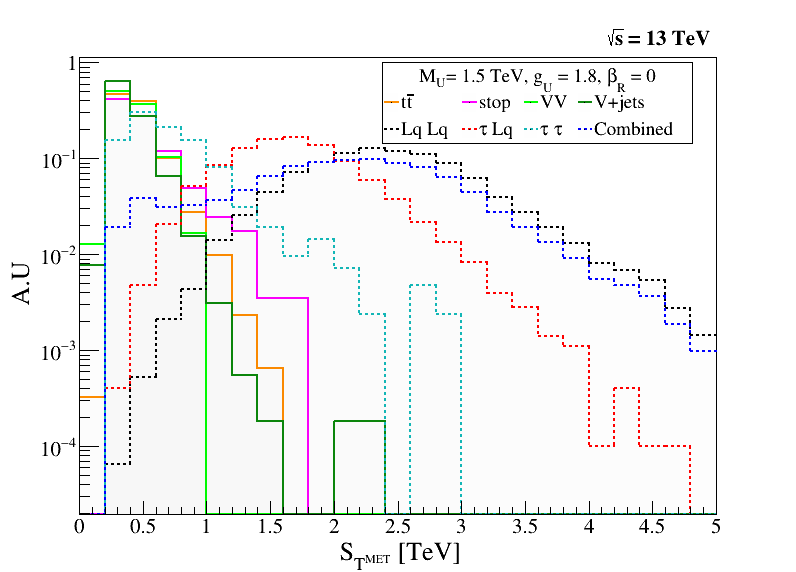

In [16]:
Histos, canvas, legend, Dict_Hist = Overlap_Histos(Signal_Histogram_Dict = Histograms_signal, 
                                                   Bkg_Histogram_Dict = Histograms_bkg, 
                                                   channel = "hadronic_dLQ",
                                                   Signal_Directory = {'Lq Lq': ['LQ_LQ'], '#tau Lq': ['Tau_LQ'], '#tau #tau': ['Tau_Tau'], 'Combined':  ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']}, 
                                                   Bkg_Directory = {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'VV': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
                                                   Title_Plot = '',
                                                   Kinematic_variable = 'sT(GeV)',
                                                   Mass = '1500', 
                                                   betard_key = 'woRHC',
                                                   Signal_to_ignore = '', 
                                                   alpha_bkg = 0.0, 
                                                   alpha_signal = 0.00, 
                                                   Stack = False, 
                                                   Log_Y = True, 
                                                   Log_X = False, 
                                                   Grid = False,
                                                   Path_folder_to_save = '')

Histos.SetTitle('; S_{T^{MET}} [TeV]; A.U') 
Histos.GetXaxis().CenterTitle(True)
Histos.GetYaxis().CenterTitle(True)

Histos.GetXaxis().SetTitleSize(0.05)
Histos.GetYaxis().SetTitleSize(0.05)
Histos.GetXaxis().SetLabelSize(0.04)
Histos.GetYaxis().SetLabelSize(0.04)

Histos.GetXaxis().SetLabelOffset(0.0001)
Histos.GetYaxis().SetLabelOffset(0.0001)
Histos.GetXaxis().SetTitleOffset(0.9)
Histos.GetYaxis().SetTitleOffset(0.95)

Histos.GetXaxis().SetMaxDigits(2)
Histos.GetYaxis().SetMaxDigits(1)    

Info in <TCanvas::Print>: pdf file ST_Histograms/sT(GeV)_hadronic_non-resonant_wRHC.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: #tau_{h}#tau_{h}
Info in <TCanvas::Print>: pdf file ST_Histograms/sT(GeV)_hadronic_non-resonant_woRHC.pdf has been created
Info in <TCanvas::Print>: pdf file ST_Histograms/sT(GeV)_hadronic_sLQ_wRHC.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: b#tau_{h}#tau_{h}
Info in <TCanvas::Print>: pdf file ST_Histograms/sT(GeV)_hadronic_sLQ_woRHC.pdf has been created
Info in <TCanvas::Print>: pdf file ST_Histograms/sT(GeV)_hadronic_dLQ_wRHC.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: bb#tau_{h}#tau_{h}
Info in <TCanvas::Print>: pdf file ST_Histograms/sT(GeV)_hadronic_dLQ_woRHC.pdf has been created
Info in <TCanvas::Print>: pdf file ST_Histograms/sT(GeV)_semileptonic_non-resonant_wRHC.pdf has been created
Warning in <TCanvas::Constructor>: Dele

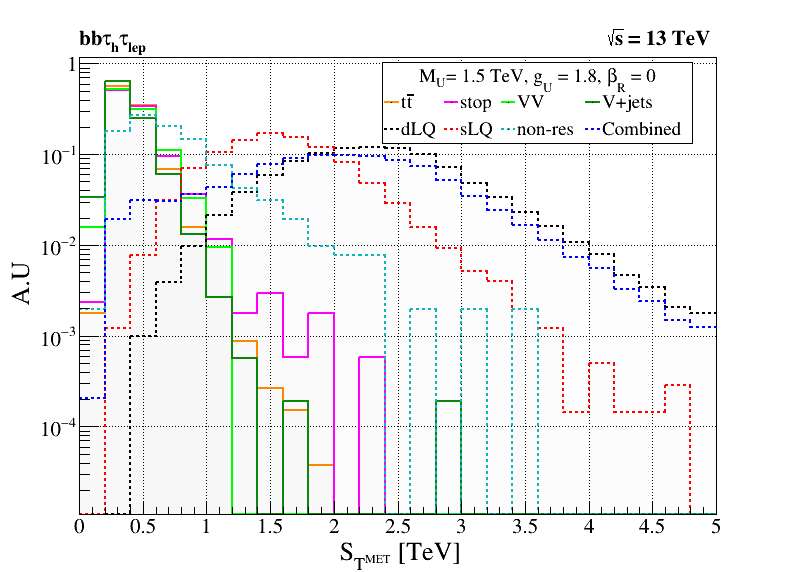

In [17]:
try: os.mkdir('ST_Histograms')
except: pass

for process in channels:
    
    if (process == 'hadronic_non-resonant'): titulo = '#tau_{h}#tau_{h}'
    if (process == 'hadronic_sLQ'): titulo = 'b#tau_{h}#tau_{h}'
    if (process == 'hadronic_dLQ'): titulo = 'bb#tau_{h}#tau_{h}'
    if (process == 'semileptonic_non-resonant'): titulo = '#tau_{h}#tau_{lep}'
    if (process == 'semileptonic_sLQ'): titulo = 'b#tau_{h}#tau_{lep}'
    if (process == 'semileptonic_dLQ'): titulo = 'bb#tau_{h}#tau_{lep}'   
                    
    Histos, canvas, legend, Dict_Hist = Overlap_Histos(Signal_Histogram_Dict = Histograms_signal, 
                                                   Bkg_Histogram_Dict = Histograms_bkg, 
                                                   channel = process,
                                                   Signal_Directory = {'dLQ': ['LQ_LQ'], 'sLQ': ['Tau_LQ'], 'non-res': ['Tau_Tau'], 'Combined':  ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']}, 
                                                   Bkg_Directory = {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'VV': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
                                                   Title_Plot = titulo,
                                                   Kinematic_variable = 'sT(GeV)',
                                                   Mass = '1500', 
                                                   betard_key = 'wRHC',
                                                   Signal_to_ignore = '', 
                                                   alpha_bkg = 0.0, 
                                                   alpha_signal = 0.00, 
                                                   Stack = False, 
                                                   Log_Y = True, 
                                                   Log_X = False, 
                                                   Grid = False,
                                                   Path_folder_to_save = '')
    Histos.SetTitle('; S_{T^{MET}} [TeV]; A.U') 
    Histos.GetXaxis().CenterTitle(True)
    Histos.GetYaxis().CenterTitle(True)
    
    Histos.GetXaxis().SetTitleSize(0.05)
    Histos.GetYaxis().SetTitleSize(0.05)
    Histos.GetXaxis().SetLabelSize(0.04)
    Histos.GetYaxis().SetLabelSize(0.04)
    
    Histos.GetXaxis().SetLabelOffset(0.0001)
    Histos.GetYaxis().SetLabelOffset(0.0001)
    Histos.GetXaxis().SetTitleOffset(0.9)
    Histos.GetYaxis().SetTitleOffset(0.95)
    
    Histos.GetXaxis().SetMaxDigits(2)
    Histos.GetYaxis().SetMaxDigits(1)    
    canvas.SetGrid()
    canvas.SaveAs(os.path.join('ST_Histograms', f'sT(GeV)_{process}_wRHC.pdf')) 
    
    Histos, canvas, legend, Dict_Hist = Overlap_Histos(Signal_Histogram_Dict = Histograms_signal, 
                                                   Bkg_Histogram_Dict = Histograms_bkg, 
                                                   channel = process,
                                                   Signal_Directory = {'dLQ': ['LQ_LQ'], 'sLQ': ['Tau_LQ'], 'non-res': ['Tau_Tau'], 'Combined':  ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']}, 
                                                   Bkg_Directory = {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'VV': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
                                                   Title_Plot = titulo,
                                                   Kinematic_variable = 'sT(GeV)',
                                                   Mass = '1500', 
                                                   betard_key = 'woRHC',
                                                   Signal_to_ignore = '', 
                                                   alpha_bkg = 0.0, 
                                                   alpha_signal = 0.00, 
                                                   Stack = False, 
                                                   Log_Y = True, 
                                                   Log_X = False, 
                                                   Grid = False,
                                                   Path_folder_to_save = '')

    Histos.SetTitle('; S_{T^{MET}} [TeV]; A.U') 
    Histos.GetXaxis().CenterTitle(True)
    Histos.GetYaxis().CenterTitle(True)
    
    Histos.GetXaxis().SetTitleSize(0.05)
    Histos.GetYaxis().SetTitleSize(0.05)
    Histos.GetXaxis().SetLabelSize(0.04)
    Histos.GetYaxis().SetLabelSize(0.04)
    
    Histos.GetXaxis().SetLabelOffset(0.0001)
    Histos.GetYaxis().SetLabelOffset(0.0001)
    Histos.GetXaxis().SetTitleOffset(0.9)
    Histos.GetYaxis().SetTitleOffset(0.95)
    
    Histos.GetXaxis().SetMaxDigits(2)
    Histos.GetYaxis().SetMaxDigits(1)    
    canvas.SetGrid()
    canvas.SaveAs(os.path.join('ST_Histograms', f'sT(GeV)_{process}_woRHC.pdf')) 

In [19]:
suffix_by_betard = {'wRHC': '', 'woRHC': '_wo_RHC'}
header_by_betard = {'wRHC': '#beta_{R} = -1', 'woRHC': '#beta_{R} = 0'}

def Overlap_Histos(Signal_Histogram_Dict, 
                   Bkg_Histogram_Dict, 
                   channel,
                   Signal_Directory, 
                   Bkg_Directory, 
                   Title_Plot,
                   Kinematic_variable,
                   Mass, 
                   betard_key = 'wRHC',
                   Signal_to_ignore = '', 
                   alpha_bkg = 0.05, 
                   alpha_signal = 0.05, 
                   Stack = False, 
                   Log_Y = False, 
                   Log_X = True, 
                   Grid = False,
                   Path_folder_to_save = ''):
    
    #if Stack is False -> Histograms will be normalized by A.U
    #if Stack is True -> Histograms will be normalized by number of physical events
    
    #canvas = TCanvas(Title_Plot, " ", 0, 0, 1280, 720)
    canvas = TCanvas(Title_Plot, " ", 0, 0, 800, 600)
    
    
    #legend = TLegend(0.9,.4,1,.89) #Legend outside the graph
    legend = TLegend(0.48,.75,0.87,.89)
    legend.SetTextFont(132)
    legend.SetNColumns(4) 
    legend.SetHeader('M_{U}' + f'= {int(Mass)/1000} TeV' + ', g_{U} = 1.8' + ', ' + header_by_betard[betard_key],"C")
                       
    legend.SetLineWidth(1)
    #legend.SetFillStyle(0) #Transparent legend window
    
    x_axis = Kinematic_variable.replace('(GeV)', '[GeV]')
    
    Histos = THStack('hist', Title_Plot)
    colors = [94,6,3,209,4,2,226,1] #https://root-forum.cern.ch/t/what-is-your-best-way-to-increment-colors/13809
    
    Dict_Hist = {}
        
    for i in range(len(Bkg_Directory.keys())):
            bkg_key = list(Bkg_Directory.keys())[i]
            bkg_list = Bkg_Directory[bkg_key]
            
            histo_list = []
            for bkg in bkg_list:
                if (bkg != Signal_to_ignore):
                    if (Bkg_Histogram_Dict[channel][bkg][Kinematic_variable] != {}):
                        h = Bkg_Histogram_Dict[channel][bkg][Kinematic_variable]
                        h.Scale(Read_Cutflows_N_Events(channel, bkg)/h.Integral())
                        histo_list.append(h)
                
            histo_Nevents = root_analysis.sum_histos(histo_list)
            histo_normalized = root_analysis.sum_histos(histo_list)
            histo_normalized.Scale(1.0/histo_normalized.Integral())
            
            if (Stack): 
                histo = histo_Nevents
                histo.SetTitle(f'{bkg_key}; {x_axis}; Events')
            else: 
                histo = histo_normalized
                histo.SetTitle(f'{bkg_key}; {x_axis}; A.U')
            
            color = len(Signal_Directory.keys()) + i + 1
            if color == 7: color = 3
            
            color = colors[i]
            
            histo.SetLineColor(color)
            histo.SetFillColorAlpha(color, alpha_bkg)
            histo.SetLineWidth(2)
            histo.SetDirectory(0)  
            histo.Rebin(2)
            
            Histos.Add(histo)
            Dict_Hist[bkg_key] = histo
            legend.AddEntry(histo,bkg_key)
    
    Signal_Histogram_Dict = Signal_Histogram_Dict[betard_key]
    for j in range(len(Signal_Directory.keys())):
            signal_key = list(Signal_Directory.keys())[j]
            signal_list = Signal_Directory[signal_key]
            
            histo_list = []
            for signal in signal_list:
                if (signal != Signal_to_ignore):
                    if (Signal_Histogram_Dict[channel][Mass][signal][Kinematic_variable] != {}):
                        h = Signal_Histogram_Dict[channel][Mass][signal][Kinematic_variable]
                        h.Scale(Read_Cutflows_N_Events(channel, f'{signal}{suffix_by_betard[betard_key]}_{Mass}')/h.Integral())
                        histo_list.append(h)
                
            histo_Nevents = root_analysis.sum_histos(histo_list)
            
            histo_normalized = root_analysis.sum_histos(histo_list)
            histo_normalized.Scale(1.0/histo_normalized.Integral())
        
            if (Stack): 
                histo = histo_Nevents
                histo.SetTitle(f'{signal_key}; {x_axis}; Events')
            else: 
                histo = histo_normalized

                if signal_key == 'sLQ':
                    weight = 58.7/378.5
                    histo.Scale(weight/histo.Integral())
                if signal_key == 'dLQ':
                    weight = 34.3/378.5
                    histo.Scale(weight/histo.Integral())
                if signal_key == 'non-res':
                    weight = 285.5/378.5
                    histo.Scale(weight/histo.Integral())
                
                histo.SetTitle(f'{signal_key}; {x_axis}; A.U')
            
            color = j + 1
            if color == 3: color = 7
            
            color = colors[i + j + 1]
            
            histo.SetLineColor(color)
            histo.SetFillColorAlpha(color, alpha_signal)
            histo.SetLineStyle(2)
            histo.SetLineWidth(2)
            histo.SetDirectory(0) 
            histo.Rebin(2)
            
            Histos.Add(histo)
            Dict_Hist[signal_key] = histo
            legend.AddEntry(histo,signal_key)
            
    if Log_Y: canvas.SetLogy()
    if Log_X: canvas.SetLogx()
    if Grid: canvas.SetGrid()   
                       
    if Stack:
        Histos.Draw("hist")
        Histos.SetTitle(f'; {x_axis}; Events')  
        
    else: 
        Histos.Draw("histnostack")
        Histos.SetTitle(f'; {x_axis}; A.U')  
    
    latex = TLatex()
    latex.SetNDC()
    latex.SetTextSize(0.04)
    latex.SetTextFont(22) #https://root.cern.ch/doc/master/classTAttText.html
    latex.DrawLatex(0.76,0.92,'#sqrt{s} = 13 TeV')
    latex.DrawLatex(0.1,0.92,Title_Plot)

    Histos.GetXaxis().SetTitleFont(132)
    Histos.GetXaxis().SetLabelFont(132)
    Histos.GetYaxis().SetTitleFont(132)
    Histos.GetYaxis().SetLabelFont(132)                       
                       
    #latex.DrawLatex(0.61,0.91,'#sqrt{s} = 13 TeV, L = 137 fb^{-1}')
    canvas.Draw()
    legend.Draw('same')
    
    #Histos.GetXaxis().SetLimits(0.0, float(Mass)*3)          
    
    if Path_folder_to_save != '':
        try: os.mkdir(Path_folder_to_save)
        except: pass

        with root_analysis.Quiet():
            root_analysis.Save_Histograms_png(Path_folder_to_save, Dict_Hist, Log_Y = True)
            root_analysis.Write_txt_file_with_high_per_bin(os.path.join(Path_folder_to_save, 'high_per_bin'), Dict_Hist)
            canvas.SaveAs(os.path.join(Path_folder_to_save, f'THStack_{channel}.png')) 
            
    Dict_Hist['THStack'] = Histos     
    
    return Histos, canvas, legend, Dict_Hist

Warning in <TCanvas::Constructor>: Deleting canvas with same name: b#tau_{h}#tau_{lep}
Info in <TCanvas::Print>: pdf file ST_Histograms/sT(GeV)_semileptonic_sLQ_wRHC.pdf has been created


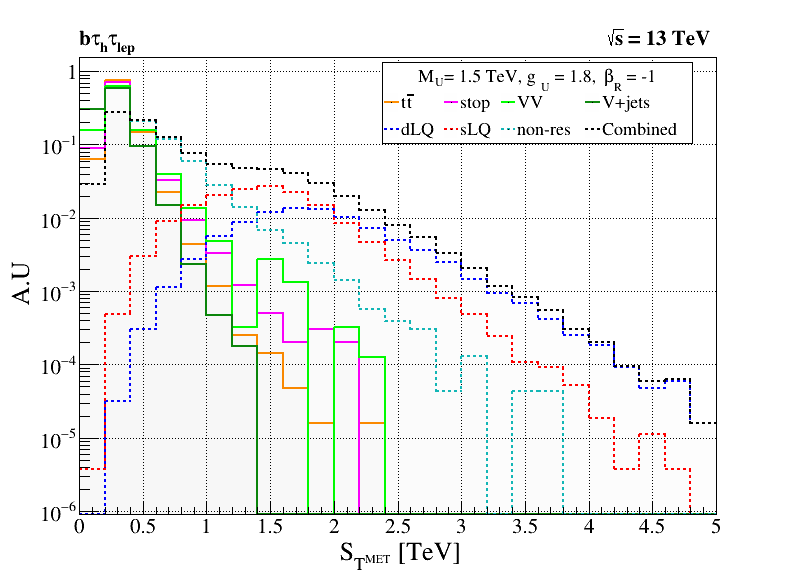

In [20]:
process = 'semileptonic_sLQ'
titulo = 'b#tau_{h}#tau_{lep}'
                
Histos, canvas, legend, Dict_Hist = Overlap_Histos(Signal_Histogram_Dict = Histograms_signal, 
                                               Bkg_Histogram_Dict = Histograms_bkg, 
                                               channel = process,
                                               Signal_Directory = {'dLQ': ['LQ_LQ'], 'sLQ': ['Tau_LQ'], 'non-res': ['Tau_Tau'], 'Combined':  ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']}, 
                                               Bkg_Directory = {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'VV': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
                                               Title_Plot = titulo,
                                               Kinematic_variable = 'sT(GeV)',
                                               Mass = '1500', 
                                               betard_key = 'wRHC',
                                               Signal_to_ignore = '', 
                                               alpha_bkg = 0.0, 
                                               alpha_signal = 0.00, 
                                               Stack = False, 
                                               Log_Y = True, 
                                               Log_X = False, 
                                               Grid = False,
                                               Path_folder_to_save = '')

Histos.SetTitle('; S_{T^{MET}} [TeV]; A.U') 
Histos.GetXaxis().CenterTitle(True)
Histos.GetYaxis().CenterTitle(True)

Histos.GetXaxis().SetTitleSize(0.05)
Histos.GetYaxis().SetTitleSize(0.05)
Histos.GetXaxis().SetLabelSize(0.04)
Histos.GetYaxis().SetLabelSize(0.04)

Histos.GetXaxis().SetLabelOffset(0.0001)
Histos.GetYaxis().SetLabelOffset(0.0001)
Histos.GetXaxis().SetTitleOffset(0.9)
Histos.GetYaxis().SetTitleOffset(0.95)

Histos.GetXaxis().SetMaxDigits(2)
Histos.GetYaxis().SetMaxDigits(1)    
canvas.SetGrid()
canvas.SaveAs(os.path.join('ST_Histograms', f'sT(GeV)_{process}_wRHC.pdf')) 

In [437]:
suffix_by_betard = {'wRHC': '', 'woRHC': '_wo_RHC'}
header_by_betard = {'wRHC': '#beta_{R} = -1', 'woRHC': '#beta_{R} = 0'}

def Overlap_Histos(Signal_Histogram_Dict, 
                   Bkg_Histogram_Dict, 
                   channel,
                   Signal_Directory, 
                   Bkg_Directory, 
                   Title_Plot,
                   Kinematic_variable,
                   Mass, 
                   betard_key = 'wRHC',
                   Signal_to_ignore = '', 
                   alpha_bkg = 0.05, 
                   alpha_signal = 0.05, 
                   Stack = False, 
                   Log_Y = False, 
                   Log_X = True, 
                   Grid = False,
                   Path_folder_to_save = ''):
    
    #if Stack is False -> Histograms will be normalized by A.U
    #if Stack is True -> Histograms will be normalized by number of physical events
    
    #canvas = TCanvas(Title_Plot, " ", 0, 0, 1280, 720)
    canvas = TCanvas(Title_Plot, " ", 0, 0, 800, 600)
    
    
    #legend = TLegend(0.9,.4,1,.89) #Legend outside the graph
    legend = TLegend(0.48,.75,0.87,.89)
    legend.SetTextFont(132)
    legend.SetNColumns(4) 
    legend.SetHeader('M_{U}' + f'= {int(Mass)/1000} TeV' + ', g_{U} = 1.8' + ', ' + header_by_betard[betard_key],"C")
                       
    legend.SetLineWidth(1)
    #legend.SetFillStyle(0) #Transparent legend window
    
    x_axis = Kinematic_variable.replace('(GeV)', '[GeV]')
    
    Histos1 = THStack('hist', Title_Plot)
    Histos2 = THStack('hist', Title_Plot)
    Histos3 = THStack('hist', Title_Plot)
                       
    colors = [94,99,210,209,4,2,226,1] #https://root-forum.cern.ch/t/what-is-your-best-way-to-increment-colors/13809
    
    Dict_Hist = {}
        
    for i in range(len(Bkg_Directory.keys())):
            bkg_key = list(Bkg_Directory.keys())[i]
            bkg_list = Bkg_Directory[bkg_key]
            
            histo_list = []
            for bkg in bkg_list:
                if (bkg != Signal_to_ignore):
                    if (Bkg_Histogram_Dict[channel][bkg][Kinematic_variable] != {}):
                        h = Bkg_Histogram_Dict[channel][bkg][Kinematic_variable]
                        h.Scale(Read_Cutflows_N_Events(channel, bkg)/h.Integral())
                        histo_list.append(h)
                
            histo_Nevents = root_analysis.sum_histos(histo_list)
            histo_normalized = root_analysis.sum_histos(histo_list)
            histo_normalized.Scale(1.0/histo_normalized.Integral())
            
            if (Stack): 
                histo = histo_Nevents
                histo.SetTitle(f'{bkg_key}; {x_axis}; Events')
            else: 
                histo = histo_normalized
                histo.SetTitle(f'{bkg_key}; {x_axis}; A.U')
            
            color = len(Signal_Directory.keys()) + i + 1
            if color == 7: color = 3
            
            color = colors[i]
            
            histo.SetLineColor(color)
            histo.SetFillColorAlpha(color, alpha_bkg)
            histo.SetLineWidth(2)
            histo.SetDirectory(0)  
            histo.Rebin(2)
            histo.GetYaxis().SetRangeUser(0.0001,1)
            
            Histos1.Add(histo)
            Dict_Hist[bkg_key] = histo
            legend.AddEntry(histo,bkg_key)
    
    Signal_Histogram_Dict = Signal_Histogram_Dict[betard_key]
    for j in range(len(Signal_Directory.keys())):
            signal_key = list(Signal_Directory.keys())[j]
            signal_list = Signal_Directory[signal_key]
            
            histo_list = []
            for signal in signal_list:
                if (signal != Signal_to_ignore):
                    if (Signal_Histogram_Dict[channel][Mass][signal][Kinematic_variable] != {}):
                        h = Signal_Histogram_Dict[channel][Mass][signal][Kinematic_variable]
                        h.Scale(Read_Cutflows_N_Events(channel, f'{signal}{suffix_by_betard[betard_key]}_{Mass}')/h.Integral())
                        histo_list.append(h)
                
            histo_Nevents = root_analysis.sum_histos(histo_list)
            
            histo_normalized = root_analysis.sum_histos(histo_list)
            histo_normalized.Scale(1.0/histo_normalized.Integral())
        
            if (Stack): 
                histo = histo_Nevents
                histo.SetTitle(f'{signal_key}; {x_axis}; Events')
            else: 
                histo = histo_normalized

                if signal_key == 'sLQ':
                    weight = 58.7/378.5
                    histo.Scale(weight/histo.Integral())
                if signal_key == 'dLQ':
                    weight = 34.3/378.5
                    histo.Scale(weight/histo.Integral())
                if signal_key == 'non-res':
                    weight = 285.5/378.5
                    histo.Scale(weight/histo.Integral())
                
                histo.SetTitle(f'{signal_key}; {x_axis}; A.U')
            
            color = j + 1
            if color == 3: color = 7
            
            color = colors[i + j + 1]
            
            histo.SetLineColor(color)
            histo.SetFillColorAlpha(color, alpha_signal)
            histo.SetLineStyle(0)
            histo.SetLineWidth(0)
            histo.SetDirectory(0) 
            histo.Rebin(2)
            histo.GetYaxis().SetRangeUser(0.0001,1)

            if signal_key != 'Combined': 
                Histos2.Add(histo)
                histo.SetMarkerSize()
                legend.AddEntry(histo,signal_key)
            else:  
                histo.SetLineStyle(2) 
                histo.SetLineWidth(2)
                histo.SetFillColorAlpha(color, 0.0)    
                histo.SetMarkerStyle(21)
                # histo.SetMarkerSize(2)
                Histos3.Add(histo)
                legend.AddEntry(histo,signal_key)
                
            Dict_Hist[signal_key] = histo
            
    if Log_Y: canvas.SetLogy()
    if Log_X: canvas.SetLogx()
    if Grid: canvas.SetGrid()   
                       
    if Stack:
        Histos1.Draw("hist")
        Histos1.SetTitle(f'; {x_axis}; Events')  
        
    else: 

        # Histos2.Draw("hist")
        # Histos3.Draw("*Hsame")
        # Histos1.Draw("histnostacksame")
        
        # Histos1.Draw("histnostack")
        # Histos2.Draw("histsame")
        # Histos3.Draw("*Hsame")
        
        Histos3.Draw("")        
        Histos2.Draw("histsame")
        Histos1.Draw("histnostacksame")
        Histos1.SetTitle(f'; {x_axis}; A.U')  
        Histos2.SetTitle(f'; {x_axis}; A.U')  
        Histos3.SetTitle(f'; {x_axis}; A.U')  
    
    latex = TLatex()
    latex.SetNDC()
    latex.SetTextSize(0.04)
    latex.SetTextFont(22) #https://root.cern.ch/doc/master/classTAttText.html
    latex.DrawLatex(0.76,0.92,'#sqrt{s} = 13 TeV')
    latex.DrawLatex(0.1,0.92,Title_Plot)

    Histos1.GetXaxis().SetTitleFont(132)
    Histos1.GetXaxis().SetLabelFont(132)
    Histos1.GetYaxis().SetTitleFont(132)
    Histos1.GetYaxis().SetLabelFont(132)                       
                       
    #latex.DrawLatex(0.61,0.91,'#sqrt{s} = 13 TeV, L = 137 fb^{-1}')
    canvas.Draw()
    legend.Draw('same')
    
    #Histos.GetXaxis().SetLimits(0.0, float(Mass)*3)          
    
    if Path_folder_to_save != '':
        try: os.mkdir(Path_folder_to_save)
        except: pass

        with root_analysis.Quiet():
            root_analysis.Save_Histograms_png(Path_folder_to_save, Dict_Hist, Log_Y = True)
            root_analysis.Write_txt_file_with_high_per_bin(os.path.join(Path_folder_to_save, 'high_per_bin'), Dict_Hist)
            canvas.SaveAs(os.path.join(Path_folder_to_save, f'THStack_{channel}.png')) 
            
    Dict_Hist['THStack'] = Histos     
    
    return Histos1, Histos2, Histos3, canvas, legend, Dict_Hist

Warning in <TCanvas::Constructor>: Deleting canvas with same name: b#tau_{h}#tau_{lep}
Info in <TCanvas::Print>: pdf file ST_Histograms/sT(GeV)_semileptonic_sLQ_wRHC.pdf has been created


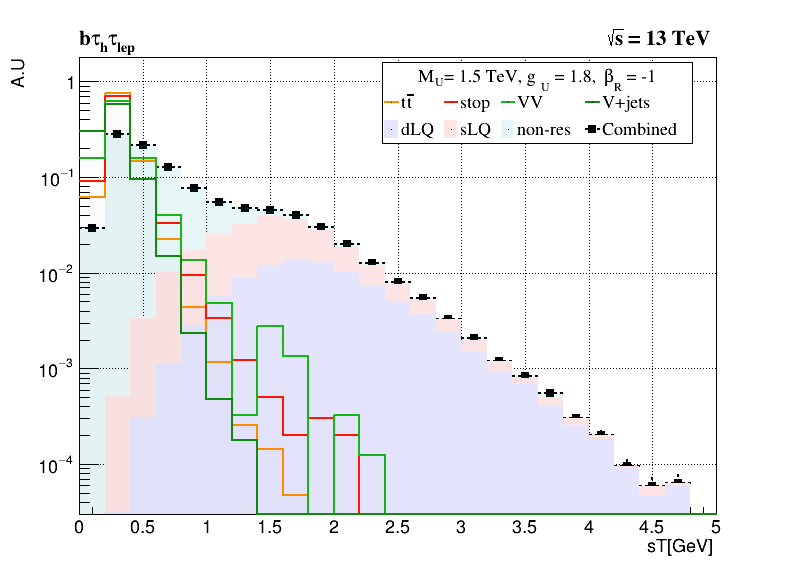

In [438]:
process = 'semileptonic_sLQ'
titulo = 'b#tau_{h}#tau_{lep}'
                
Histos1, Histos2, Histos3, canvas, legend, Dict_Hist = Overlap_Histos(Signal_Histogram_Dict = Histograms_signal, 
                                               Bkg_Histogram_Dict = Histograms_bkg, 
                                               channel = process,
                                               Signal_Directory = {'dLQ': ['LQ_LQ'], 'sLQ': ['Tau_LQ'], 'non-res': ['Tau_Tau'], 'Combined':  ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']}, 
                                               Bkg_Directory = {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'VV': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
                                               Title_Plot = titulo,
                                               Kinematic_variable = 'sT(GeV)',
                                               Mass = '1500', 
                                               betard_key = 'wRHC',
                                               Signal_to_ignore = '', 
                                               alpha_bkg = 0.00, 
                                               alpha_signal = 0.1, 
                                               Stack = False, 
                                               Log_Y = True, 
                                               Log_X = False, 
                                               Grid = False,
                                               Path_folder_to_save = '')

Histos.SetTitle('; S_{T^{MET}} [TeV]; A.U') 
Histos.GetXaxis().CenterTitle(True)
Histos.GetYaxis().CenterTitle(True)

Histos.GetXaxis().SetTitleSize(0.05)
Histos.GetYaxis().SetTitleSize(0.05)
Histos.GetXaxis().SetLabelSize(0.04)
Histos.GetYaxis().SetLabelSize(0.04)

Histos.GetXaxis().SetLabelOffset(0.0001)
Histos.GetYaxis().SetLabelOffset(0.0001)
Histos.GetXaxis().SetTitleOffset(0.9)
Histos.GetYaxis().SetTitleOffset(0.95)

Histos.GetXaxis().SetMaxDigits(2)
Histos.GetYaxis().SetMaxDigits(1)    
canvas.SetGrid()
canvas.SaveAs(os.path.join('ST_Histograms', f'sT(GeV)_{process}_wRHC.pdf')) 